In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import csv
import numpy as np

In [ ]:
# Modify your path to csv on this line
df=pd.read_csv("/content/youtube_video_details.csv")

print(f"All columns present in csv:{df.columns}")
print("All playlists' channels present in csv:")
print(df["Channel"].unique())

All columns present in csv:Index(['Video ID', 'Title', 'Channel', 'View Count', 'Likes', 'Dislikes',
       'Comment Count', 'Published Date', 'Duration', 'Channel Subscribers',
       'Type'],
      dtype='object')
All playlists' channels present in csv:
['ABC News' 'NBC News' 'CNN' 'Fox News' 'CBC News']


## Check Duplicated rows

In [ ]:
print(f"Before removal:{df.duplicated().sum()}")
df=df.drop_duplicates()
print(f"After removal:{df.duplicated().sum()}")

Before removal:0
After removal:0


# Examine Duration distribution of videos

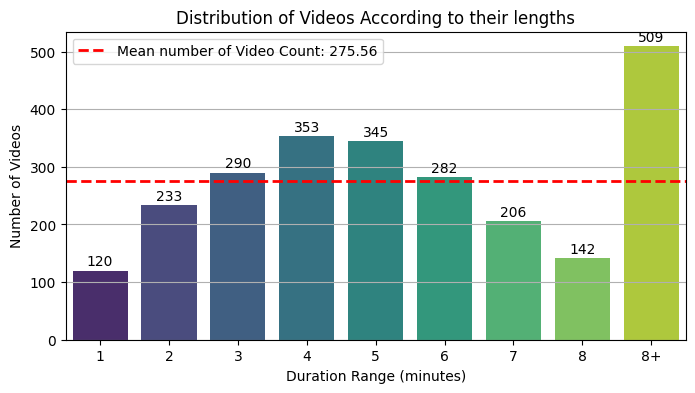

In [ ]:
def plot_df_videoDuration(df):
  bins =[int(b) for b in list(range(0, 481, 60))]+[42900]
  labels = [str(x) for x in range(1, 9)]+['8+']

  df['DurationRange'] = pd.cut(df['Duration'], bins=bins, labels=labels, right=False)

  colors = sns.color_palette('viridis', n_colors=len(labels))
  plt.figure(figsize=(8, 4))

  ax=sns.countplot(x='DurationRange', data=df, order=labels, palette=colors)
  for label, count in zip(ax.patches, df.groupby('DurationRange').size()):
      height = label.get_height()
      ax.text(
          label.get_x() + label.get_width() / 2,
          height + 3,
          f'{count}',
          ha='center',
          va='bottom'
      )
  mean_counts = df.groupby('DurationRange').size().mean()
  ax.axhline(mean_counts, color='red', linestyle='dashed', linewidth=2, label=f'Mean number of Video Count: {mean_counts:.2f}')
  plt.xlabel('Duration Range (minutes)')
  plt.ylabel('Number of Videos')
  plt.title('Distribution of Videos According to their lengths')
  ax.yaxis.grid(True)
  plt.legend()
  plt.show()

  df.drop('DurationRange', axis=1, inplace=True)

plot_df_videoDuration(df)

In [ ]:
max_count=df["Duration"].max()
min_count=df["Duration"].min()
print(f"Maximum duration in seconds: {max_count}\nMinimum duration in seconds: {min_count}")
x=len(df[df['Duration'] < 5 * 60])
y=len(df[df['Duration'] >= 5 * 60])
print(f"Videos shorter than 5 min: {x}\nVideos longer than 5 min: {y}")

Maximum duration in seconds: 42900.0
Minimum duration in seconds: 17.0
Videos shorter than 5 min: 1341
Videos longer than 5 min: 1141


### Divide the videos into short & long forms, with the column named Type

In [ ]:
Type_definition=5 #in minutes

"""
creates a new column 'Type' based on the 'Duration' values.
If the duration is >= 5 minutes, the 'Type' is set to 'Video';
otherwise, it's set to 'Short'.
"""

df['Type'] = df['Duration'].apply(lambda duration: 'Video' if duration >= Type_definition * 60 else 'Short')
print(df['Type'].value_counts())

Short    1073
Video     879
Name: Type, dtype: int64


In [ ]:
# Rearrange columns' order for better visualization
order = ['Video ID', 'Title', 'Channel', 'View Count', 'Likes', 'Dislikes', 'Comment Count', 'Published Date', 'Duration', 'Channel Subscribers', 'Type']
df = df[order]

## Summary of data - statistics table

In [1]:
'''# Applying ReLU to values in Dislikes to avoid negative values: -1
df['Dislikes'] = df['Dislikes'].apply(lambda x: max(0, x))'''

"# Applying ReLU to values in Dislikes to avoid negative values: -1\ndf['Dislikes'] = df['Dislikes'].apply(lambda x: max(0, x))"

In [ ]:
stats = df.groupby('Channel').agg({
    'View Count': ['mean', 'median', 'std'],
    'Likes': ['mean', 'median', 'std'],
    'Dislikes': ['mean', 'median', 'std'],
    'Comment Count': ['mean', 'median', 'std'],
})
stats=np.transpose(stats)
print(stats)
stats.to_csv('summary_by_channels.csv', index=True)

Channel                    ABC News       CBC News            CNN  \
View Count    mean     72777.624190   45651.304147  295902.535294   
              median   19213.000000   12378.000000  131301.000000   
              std     196721.126225  124313.729959  569744.559854   
Likes         mean       647.518359     411.677419    4650.476471   
              median     177.000000     119.000000    1691.500000   
              std       1423.212919    1254.291956   19775.973195   
Dislikes      mean       149.742981     221.322581     782.952941   
              median       3.000000       5.000000     236.500000   
              std        480.063002     738.770849    2421.773121   
Comment Count mean       422.803456       0.161290    1867.311765   
              median     132.000000       0.000000    1178.500000   
              std        932.393486       1.709661    2423.207423   

Channel                    Fox News       NBC News  
View Count    mean    217525.102609  202414.32258

### statistical Patterns:

1. **View Count Variation:**
   - **CNN Dominance:** CNN consistently achieves the highest mean view count, indicating a larger viewership compared to other channels.
   - **Variability:** Notable standard deviations is present in view counts across all channels(particularly for CNN and NBC News) suggest a diverse range of video popularity for all channels.

2. **Engagement Metrics:**
   - **CNN Engagement:** CNN leads in mean likes and dislikes counts, showcasing higher engagement from the audience with respect to the other 3 channels.
   additionally, CNN not only leads in view count and likes but also stands out with the highest mean comment count. This indicates a relatively more active engagement rate in this channel in general.
   - **Discrepancies in Dislikes:** The standard deviations in dislikes is large across in all channels,thus revealing varied audience reception and didn't display a consistent pattern

3. **Comment Count Anomaly: CBC News**
   - **Low Comment Count:** CBC News has a significantly lower mean comment count, potentially due to that fact that this channel restricted or disabled its comment sections in most of its video & shorts.

4. **View Count Spread:**
   - **Potential Virality:** Fox News, with a lower mean view count than CNN, has a standard deviation higher than its mean, indicating a high degree of variability or dispersion in the distribution of view counts.
   This potential suggested that it has published some highly controversial videos.

In [ ]:
# Arrange dataframe by publish date as datetime objects
df['Published Date'] = pd.to_datetime(df['Published Date'])
df_sorted = df.sort_values(by='Published Date')

## Examine the correlations

### For different types of video in the CSV

<ipython-input-79-6f54392adb32>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_type.corr()


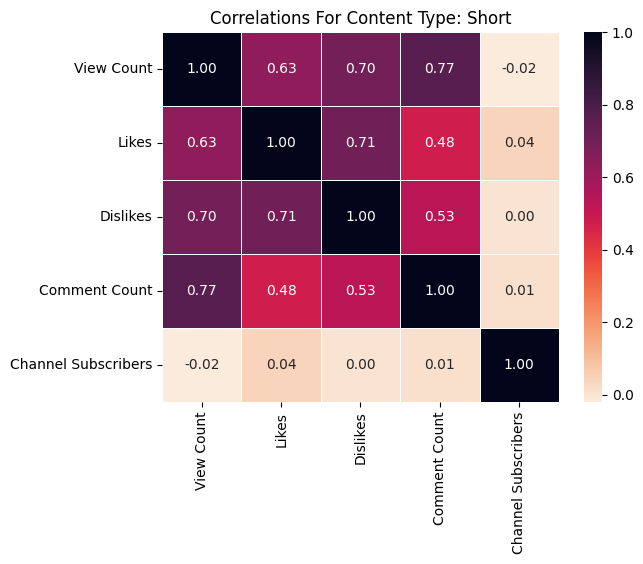

<ipython-input-79-6f54392adb32>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_type.corr()


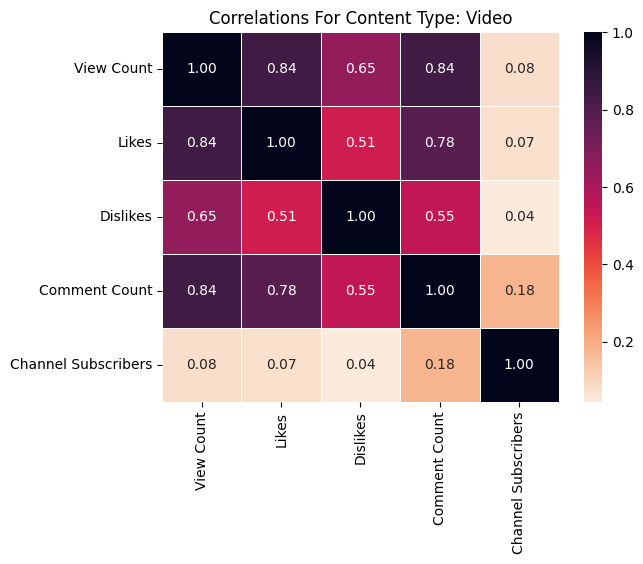

In [ ]:
types = df_sorted['Type'].unique()

for t in types:
  plot, axs = plt.subplots(1, 1)
  df_type = df_sorted[df_sorted['Type'] == t]
  df_type = df_type.drop("Duration",axis=1) # We don't count in duration time as the data is already divided
  correlation_matrix = df_type.corr()

  sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', fmt=".2f", linewidths=.4)
  axs.set_title(f'Correlations For Content Type: {t}')
  plt.show()

In comparing the correlation matrices of short-form (<= 5min) and long videos (> 5min), similar patterns emerge.

 Both categories show strong positive correlations between view count and users' engagements, indicating higher views coincide with increased likes, dislikes, and comments. Long videos exhibit generally higher correlations, suggesting a more cohesive relationship among engagement metrics.

 In Shorts, a noteworthy emphasis on dislikes in relation to view count implies potential controversy. Additionally, Shorts display stronger correlations between likes and dislikes, while long videos emphasize the significance of likes in assessing overall popularity.

 It's interesting to note that, Channel subscribers exhibit a limited influence on engagement from the audience in both categories, with weak positive correlations.

### Correlation matrix For entire CSV

<ipython-input-80-2221f2e17fd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_sorted.corr()


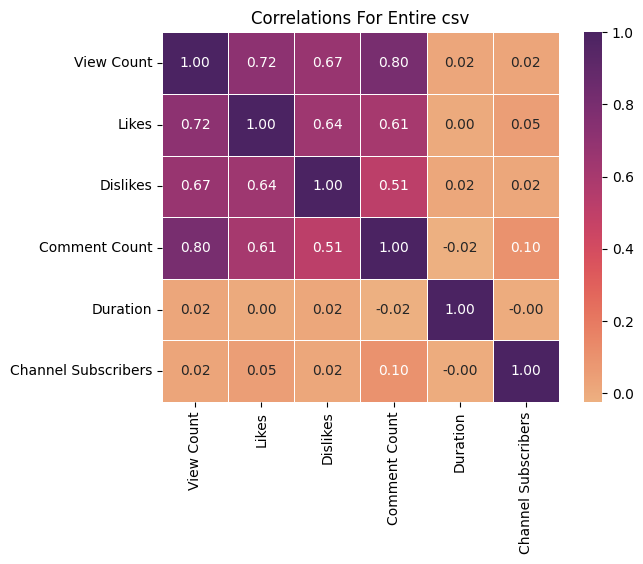

In [ ]:
correlation_matrix = df_sorted.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=.4)
plt.title('Correlations For Entire csv')
plt.show()

In [ ]:
# Plotting for different channels' views over time, for all content types
'''sns.set(style="whitegrid")
channels = df_sorted['Channel'].unique()

plot,axs = plt.subplots(len(channels), 1, figsize=(6, 3 * len(channels)))
palette = sns.color_palette("husl", len(channels))

for i, (channel, color) in enumerate(zip(channels, palette)):

    channel_df = df_sorted[df_sorted['Channel'] == channel]
    rolling_avg = channel_df['View Count'].rolling(window=7).mean()
    axs[i].plot(channel_df['Published Date'], rolling_avg, label='Rolling Average', color=color)

    axs[i].set_title(f'Content Views Over Time for Channel: {channel}')
    axs[i].set_ylabel('View Count')
    axs[i].set_xlabel('Published Date')
    axs[i].legend()


plt.tight_layout()
plt.show()'''

### Plotting for different channels' views over time, separately for different content types

In [ ]:
# define your rolling average in days
rollin_avg_window = 7

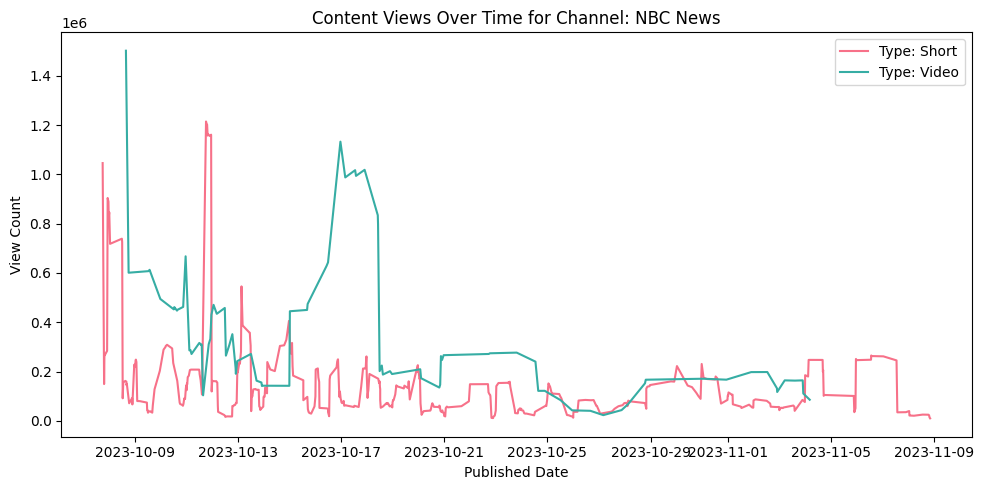

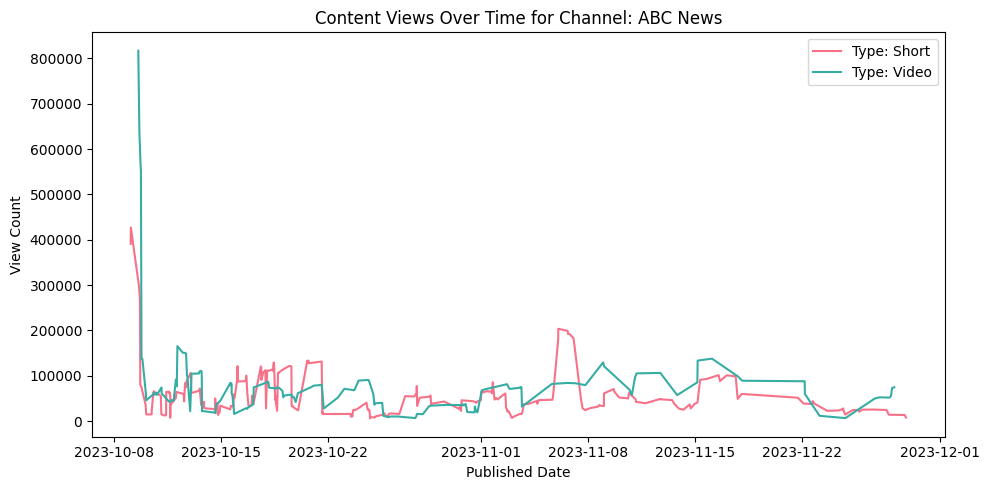

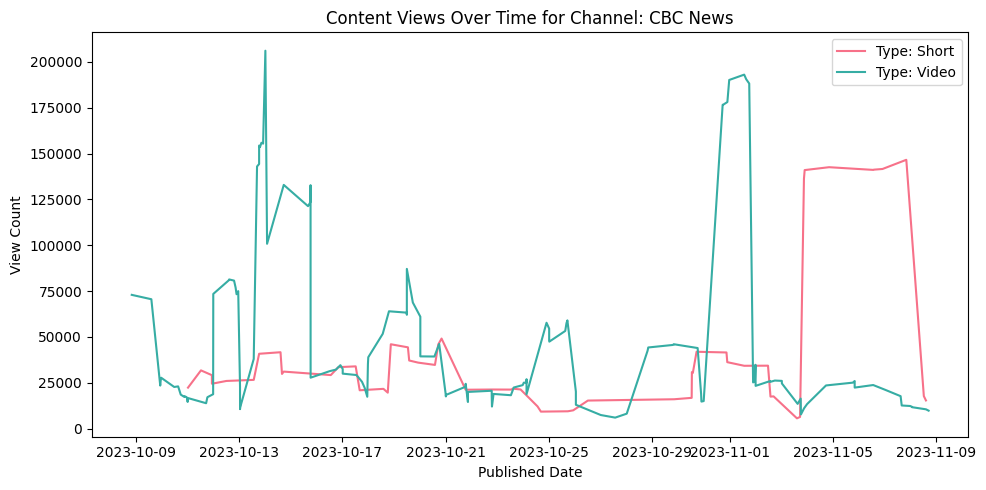

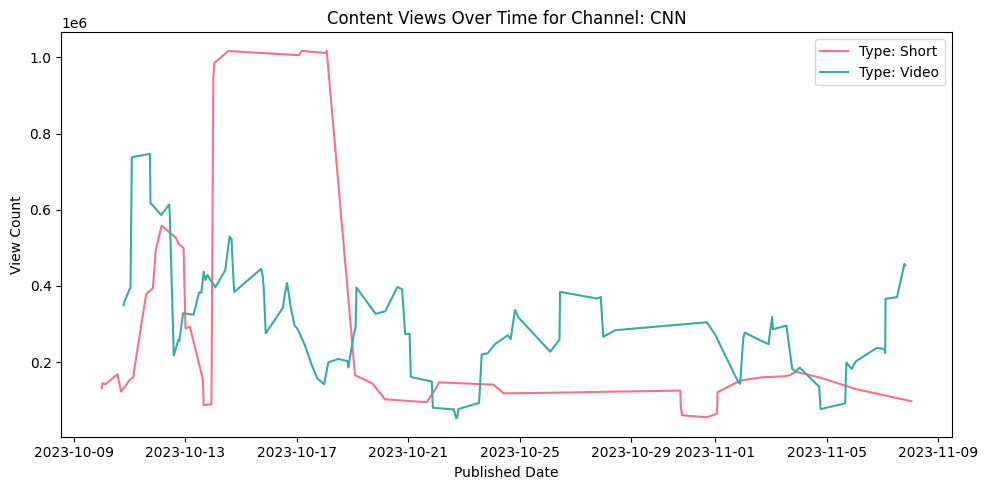

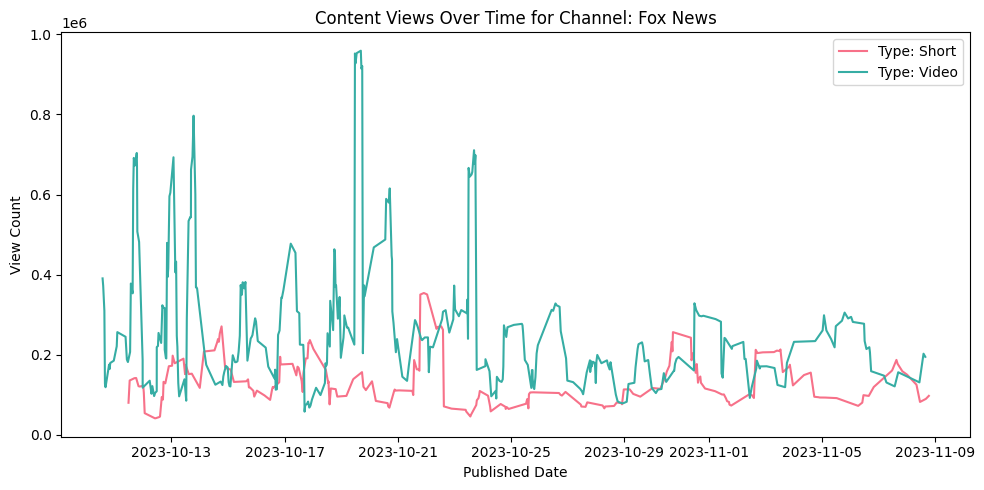

In [ ]:
channels = df_sorted['Channel'].unique()
video_types = df_sorted['Type'].unique()

for channel in channels:
    plot, axs = plt.subplots(1, 1, figsize=(10, 5))
    palette = sns.color_palette("husl", len(video_types))

    for j, video_type in enumerate(video_types):
        channel_df = df_sorted[(df_sorted['Channel'] == channel) & (df_sorted['Type'] == video_type)]
        rolling_avg = channel_df['View Count'].rolling(window=rollin_avg_window).mean()
        axs.plot(channel_df['Published Date'], rolling_avg, label=f'Type: {video_type}', color=palette[j])

    axs.set_title(f'Content Views Over Time for Channel: {channel}')
    axs.set_ylabel('View Count')
    axs.set_xlabel('Published Date')
    axs.legend()

    plt.tight_layout()
    plt.show()

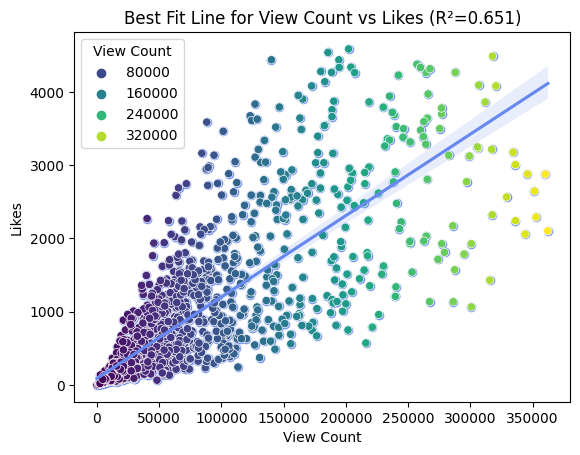

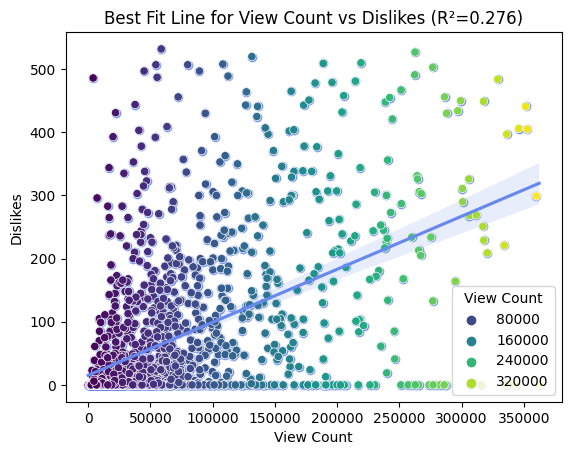

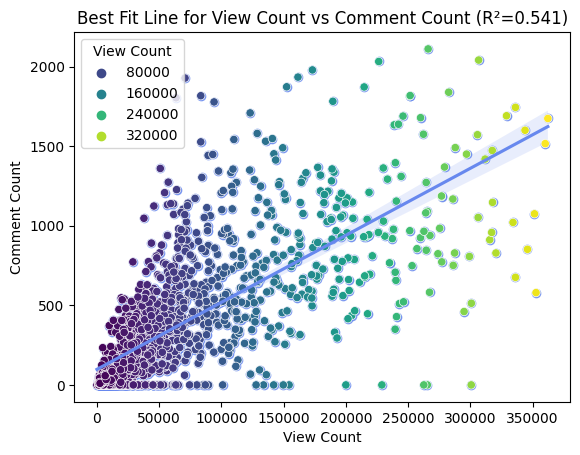

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
vars = ['View Count', 'Likes', 'Dislikes', 'Comment Count']

# Remove outliers Method #1:
# using IQR
Q1 = df_sorted[vars].quantile(0.25)
Q3 = df_sorted[vars].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = ((df_sorted[vars] < low) | (df_sorted[vars] > upper)).any(axis=1)
tmp = df_sorted[~outliers]

# Remove outliers Method #2:
# using z values(Gaussian distribution)
'''z = np.abs((df_sorted[vars] - df_sorted[vars].mean()) / df_sorted[vars].std())
tmp = df_sorted[(z < 2).all(axis=1)]

# Setting z < 2 for: about 95% (for 2 standard deviations) or
# Setting z < 3 for: 99.7% (for 3 standard deviations) of the data should fall within these bounds.'''

for col in vars[1:]:
    X = tmp[['View Count']]
    y = tmp[col]

    # Calculate R^2 values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    sns.set_palette("coolwarm")
    sns.regplot(x='View Count', y=col, data=tmp)
    sns.scatterplot(x='View Count', y=col, hue='View Count',palette='viridis', data=tmp)
    plt.title(f'Best Fit Line for View Count vs {col} (R²={r2:.3f})')
    plt.show()